# Homework 14 
## Mapping Part 2 : Group 2

### Kate Cough
### Due: July 15 2017


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import pysal as ps


%matplotlib inline

In [3]:
powerplants = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/powerplants.csv')
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300


In [4]:
#import the files we need and look at them. just powerplants for now.
powerplants = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/powerplants.csv')
#apply the function to each row of powerplants to turn it into a geodatafram
points = powerplants.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
#actually make it a geodataframe
powerplants = gpd.GeoDataFrame(powerplants, geometry=points)
#set the crs so we're not sad later
powerplants.crs = {'init':'epsg:5070'}
powerplants.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)


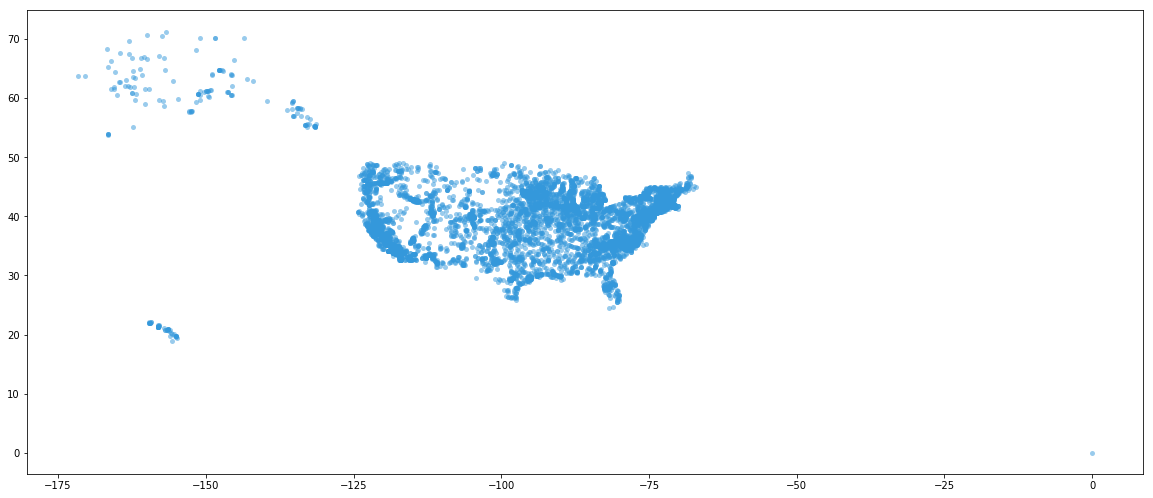

In [5]:
#always a good idea to plot it, just to see right. 
#and to make it not totally awful so our eyes don't burn
#alpha is for opacity, markeredgewidth and sizes are just 
#to change the dot sizes
#keep the axis for now so we can see the lat/long

powerplants.plot(figsize=(20,10), color='#3498DB', markeredgewidth=0, markersize=5, alpha=0.5)


Lesson: there are a LOT of powerplants in the US. 

In [ ]:
#let's plot it without the axis and set the x,y limits
#so we can just focus on the continental us
ax = powerplants.plot(figsize=(20,10), color='#3498DB', markeredgewidth=0, markersize=5, alpha=0.5)
# ax.axis('off')

#set the limits so it stays within these lat/long.
#we know the limits we want to use by looking at the map above
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

In [6]:
#import the shape file. remember it's reading EVERYTHING in the folder, not just the .shp
#but we only import the .shp

states = gpd.read_file('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
#change the crs to match the one above, use the conus albers one
#which is good for the united states but sad for other places
states.crs = {'init':'epsg:5070'}
states.head(2)

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."


In [ ]:
#plot the states, turn off the axis, make the colors not horrendous

ax = states.plot(figsize=(20,10), color='lightgrey', edgecolor='white')
# ax.axis('off')

In [ ]:
ax = states.plot(figsize=(20,10), color='lightgrey', edgecolor='white')
powerplants.plot(figsize=(20,10), ax=ax, color='#3498DB', markeredgewidth=0, markersize=5, alpha=0.5)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

In [7]:
#we need this file with the air quality monitoring info

airqual = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/annual_conc_by_monitor_2017.csv')
airqual.head(2)

,State Code,County Code,Site Num,Parameter Code,POC,Latitude,Longitude,Datum,Parameter Name,Sample Duration,...,75th Percentile,50th Percentile,10th Percentile,Local Site Name,Address,State Name,County Name,City Name,CBSA Name,Date of Last Change
0,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,1 HOUR,...,0.056,0.051,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18
1,1,3,10,44201,1,30.497478,-87.880258,NAD83,Ozone,8-HR RUN AVG BEGIN HOUR,...,0.052,0.049,0.035,"FAIRHOPE, Alabama","FAIRHOPE HIGH SCHOOL, 1 PIRATE DRIVE, FAIRHOPE...",Alabama,Baldwin,Fairhope,"Daphne-Fairhope-Foley, AL",2017-05-18


In [8]:
#turn the airqual into a geodataframe 
#read in only useful columns

airqual = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/pm25_annual_fixed.csv', usecols = ['Latitude', 'Longitude', 'Datum', 'Arithmetic Mean', '1st Max Value', 'State Name', 'County Name', 'City Name'])
points = airqual.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
airqual = gpd.GeoDataFrame(airqual, geometry=points)
airqual.crs = {'init':'epsg:5070'}
airqual.head()

,Latitude,Longitude,Datum,Arithmetic Mean,1st Max Value,State Name,County Name,City Name,geometry
0,30.497478,-87.880258,NAD83,6.535714,15.4,Alabama,Baldwin,Fairhope,POINT (-87.880258 30.497478)
1,33.284928,-85.803608,NAD83,8.851852,19.0,Alabama,Clay,Ashland,POINT (-85.803608 33.284928)
2,34.762619,-87.638097,NAD83,7.650000,17.8,Alabama,Colbert,Muscle Shoals,POINT (-87.638097 34.762619)
3,34.288567,-85.969858,NAD83,8.083333,14.8,Alabama,DeKalb,Crossville,POINT (-85.969858 34.288567)
4,33.991494,-85.992647,NAD83,9.073333,17.5,Alabama,Etowah,Gadsden,POINT (-85.99264699999998 33.991494)


# GROUP TWO: For most of these you'll need a spatial join


## 1. How many power plants are in each state?



In [9]:
#first we need a dataframe with the geometry of the
#states and the powerplants
#by having powerplants first after sjoin
#we keep the geometry of powerplants (ie the points not the polygons)
#inner is saying get rid of values w/o a match

plants_with_states = gpd.sjoin(powerplants, states, how='inner', op='within')
plants_with_states.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,...,0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [10]:
plants_with_states['NAME'].value_counts().head()

California        1222
North Carolina     461
Texas              396
New York           372
Minnesota          274
Name: NAME, dtype: int64

## 2. Which power plants are in New York?


In [9]:
plants_with_states[(plants_with_states['NAME'] == 'New York')]


,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,...,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas & Elec Corp,3249,Electric Utility,Coxsackie,Greene,12051,Baily Street,petroleum,...,43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY


## 3. Which state has the most hydroelectric power plants?


In [10]:
hydroelectric = plants_with_states[plants_with_states['PrimSource'].str.contains('hydroelectric')]
hydroelectric['NAME'].value_counts().head(1)

California    245
Name: NAME, dtype: int64

## 4. Which state produces the most energy from coal?


In [11]:
coal = plants_with_states[plants_with_states['PrimSource'].str.contains('coal')]
coal['NAME'].value_counts().head(1)

Pennsylvania    24
Name: NAME, dtype: int64

## 5. Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.



In [81]:
#first, we need to change the join around to keep
#the geometry of the states
#keep things without matches otherwise
#we'll be missing states

states_with_plants = gpd.sjoin(states, powerplants, how='left', op='contains')
states_with_plants.tail()


,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,...,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude
52,0400000US55,140273604537,29361386480,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.95616699999999 45.355489, -86.9...",...,0.0,0.0,NaN,NaN,Biomass = 3.2 MW,Other Waste Biomass,"EIA-860, EIA-860M and EIA-923",201607.0,45.390278,-92.162500
52,0400000US55,140273604537,29361386480,55,00,Wisconsin,55,01779806,WI,"(POLYGON ((-86.95616699999999 45.355489, -86.9...",...,0.0,0.0,NaN,NaN,Hydroelectric = 1.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607.0,45.157552,-92.716214
53,0400000US66,543558310,934334983,66,00,Guam,66,01802705,GU,"(POLYGON ((144.645379 13.236271, 144.647162 13...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,0400000US69,472276664,4644268325,69,00,Commonwealth of the Northern Mariana Islands,69,01779809,MP,"(POLYGON ((146.051034 16.006741, 146.051668 16...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,0400000US78,348013113,1550244955,78,00,United States Virgin Islands,78,01802710,VI,"(POLYGON ((-64.6283631965854 17.7886953589897,...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
states_with_plants.columns

Index(['AFFGEOID', 'ALAND', 'AWATER', 'GEOID', 'LSAD', 'NAME', 'STATEFP',
       'STATENS', 'STUSPS', 'geometry', 'index_right', 'Plant_Code',
       'Plant_Name', 'Utility_Na', 'Utility_ID', 'sector_nam', 'City',
       'County', 'Zip', 'Street_Add', 'PrimSource', 'Total_MW', 'Coal_MW',
       'NG_MW', 'Crude_MW', 'Bio_MW', 'Hydro_MW', 'HydroPS_MW', 'Nuclear_MW',
       'Solar_MW', 'Wind_MW', 'Geo_MW', 'Other_MW', 'source_des', 'tech_desc',
       'Source', 'Period', 'Latitude', 'Longitude'],
      dtype='object')

In [83]:
#now look for states that have nuclear as their primary source

nuclear = states_with_plants[(states_with_plants['PrimSource'] == 'nuclear')]
# nuclear.plot(color='red')



In [ ]:
non_nuclear = states_with_plants[(states_with_plants['PrimSource'] != 'nuclear')]
# non_nuclear.plot(color='darkgrey')

In [ ]:
#The code below takes an excrutiatingly long time to run, 
#so I've commented it out

In [16]:
# ax = states.plot(figsize=(20,20), color = 'lightgray', edgecolor = 'white')
# # ax.axis('off')

# nuclear.plot(ax=ax, color='red')
# non_nuclear.plot(ax=ax, color='darkgrey', alpha=0.5)

# ax.set_xlim([-130,-60])
# ax.set_ylim([25,50])

## and solar...

In [17]:
solar = states_with_plants[(states_with_plants['PrimSource'] == 'solar')]
solar.head(2)
# solar.plot(color='red')

In [ ]:
no_solar = states_with_plants[(states_with_plants['PrimSource'] != 'solar')]
no_solar.head(2)
# no_solar.plot(color='darkgrey')

In [ ]:
ax = states.plot(figsize=(20,20), color = 'lightgray', edgecolor = 'white')
# ax.axis('off')

solar.plot(ax=ax, color='red')
no_solar.plot(ax=ax, color='darkgrey', alpha=0.5)

ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

## 6. Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being orange.


In [ ]:
states.head(1)

In [ ]:
#create a new dataframe from the states geodataframe that has only the columns we want-the geometry and the stusps
states_with_geometry = states[['STUSPS', 'geometry']]
states_with_geometry.head()

In [ ]:
#read in the co2 csv file
co2 = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/Total Carbon Dioxide Emissions-StateRankings.csv')
co2.head(1)

In [ ]:
#merge the csv file via and attribute join with the geodataframe that 
#has states and geometry
#get rid of annoying thigns

states_co2 = states_with_geometry.merge(co2, left_on='STUSPS', right_on='State')
del states_co2['Note: Rankings are based on the full source data values.']
del states_co2['State']
states_co2.head()

In [ ]:
ax = states_co2.plot(column='Total Carbon Dioxide Emissions, million metric tons', cmap='OrRd', figsize=(50,50))
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

## 6. Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.


In [ ]:
#convert Total_MW column to integer
# ax = states_with_plants[column='Total_MW', cmap='OrRd', figsize=(50,50)]
# ax.set_xlim([-130,-60])
# ax.set_ylim([25,50])

In [92]:
states_with_plants['Total_MW'].head()

0    186.0
0    721.8
0     47.0
0     78.0
0    132.0
Name: Total_MW, dtype: float64

In [90]:
import math

In [91]:
math.floor(states_with_plants['Total_MW'])

TypeError: cannot convert the series to <class 'float'>

## 7. Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

## 8. Make a map of average air quality of each states, with high quality being light red and low quality being dark red


In [ ]:
#use the arithmetic mean column, the 1st max datetime,
#columns to import: Latitude, Longitude, Datum, Arithmetic Mean, 1st Max Value, State name, County Name, City Name
airqual = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/pm25_annual_fixed.csv', usecols = ['Latitude', 'Longitude', 'Datum', 'Arithmetic Mean', '1st Max Value', 'State Name', 'County Name', 'City Name'])
airqual.head()

In [ ]:
#turn the airqual into a geodataframe
airqual = pd.read_csv('/Users/kaitlincough/Documents/Lede/foundation/14-homework-powerplants/pm25_annual_fixed.csv', usecols = ['Latitude', 'Longitude', 'Datum', 'Arithmetic Mean', '1st Max Value', 'State Name', 'County Name', 'City Name'])
points = airqual.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
airqual = gpd.GeoDataFrame(airqual, geometry=points)
airqual.crs = {'init':'epsg:5070'}
airqual.head()

In [ ]:
states.head()

In [ ]:
#join it with states to get the staets polygons
#MAKE SURE YOU HAVE POLYGONS--to get them, you have to put the STATES df first
#that's the geometry it keeps
#use a left join to keep all the info
airqual_with_states = gpd.sjoin(states, airqual, how='left', op='contains')
airqual_with_states.head(2)

In [ ]:
#plot the arithmetic mean column of the fancy new df

ax = airqual_with_states.plot(column='Arithmetic Mean', cmap='OrRd', figsize=(50,50))

ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

## 9. Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red


In [ ]:
#same same but different

ax = airqual_with_states.plot(column='1st Max Value', cmap='OrRd', figsize=(50,50))

ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

## 10. Map of average PM2.5 measurement by county


## 11. Make a map with color coded power plants, and a 100 mile circle about major American cities.


## 12. Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

## 13. How many power plants are in each state